# How to make nice python figures (fast)

This tutorial provides some best practice guidelines and example codes on how to create high-quality figures and images **directly** in python.

Hendrik Nicolai acknowledges Matthias Steinhausen (TU Darmstadt) and Hannes Böttler (TU Darmstadt) for sharing their flameplot tutorial.

## Guidelines for the generation of scientific plots

Before improving code quality and structure for faster plot generation, it is essential to outline a few rules that should be followed when creating figures for scientific publications.

- **General plotting style**
  - Consistent style
    - colorscheme, axis labels, ...
  - **Typeface and font size**
    - Latex-rendering (Not a must, but nice to have)
    - Matching typeface and font-size by
      - matching font size
      - matching figure size
      - matching typeface (optional)
    - *In Latex: If created this way you should include the figure without scaling in latex, e.g. use `scale=1` instead of the commonly used `width=\textwidth` command.*
- **Figure quality and resolution**
  - `.pdf`: Line-plots and small plots (usually are employed as scalable graphics)
  - `.png/.jpeg`: Plots with color maps / contour plots (when pdf is not applicable)
  - Sufficient resolution (~1000 dpi)
- **Labels and units**
  - Consistent use
  - Units non-italic
  - Typical formatting
    - $T$ / K --> recommended by [SI guidelines](https://www.nist.gov/pml/special-publication-811/nist-guide-si-chapter-7-rules-and-style-conventions-expressing-values)
    - $T$ in K
    - $T$ (K)
    - $T$ [K]
- **Data visualization**
  - High level of self-explanatory
    - often people scroll through papers/reports only looking at the figures

## How to define a plotting style (fast)

One of the key aspects in the generation of high-quality figures is a consistent design of the plots, which includes
- Font-size
- Typeface
- Text-rendering
- Color-schemes
- Axis position and design
- ...

This can be a tedious task, depending on how it is implemented in Python.
In the following, we introduce an easy way to achieve a consistent design using matplotlib stylesheets, which has significantly improved my plotting workflow and saved considerable time.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

## Why to use plotting stylesheets in python?

Before, showing you how matplotlib stylesheets can be used in your python code, let us look at different ways of defining a custom plotting style to a plot.

Therefore, we consider a custom plotting style we want to apply to all our plots with the following options:
- Text rendering with latex
- font size of 16 pt
- colorblind-friendly color and line styles (following e.g. this
  [Guideline](https://www.cta-observatory.org/wp-content/uploads/2020/10/CTA_ColourBlindness_BestPractices-1.pdf))
  - colorscheme (tableau10blind)
  - line styles

The colors and line styles we want to use are: 
```python
# Tableau colorblind 10
tableau10blind = [(0, 107, 164), (255, 128, 14), (171, 171, 171), (89, 89, 89),
             (95, 158, 209), (200, 82, 0), (137, 137, 137), (163, 200, 236),
             (255, 188, 121), (207, 207, 207)]
linestyles = ["-", "--", "-.", ":", "-", "--", "-.", ":"]
```

### Direct definition (beginner)
Let us start out with the version, probably most python beginners would choose: Defining the plotting style directly in the plotting commands.

| Pros | Cons |
| ------- | ------- |
| Intuitive | Tedious to apply (for every axis and figure) |
| Simple to understand | Ineffective |
|  | Cluttered code |

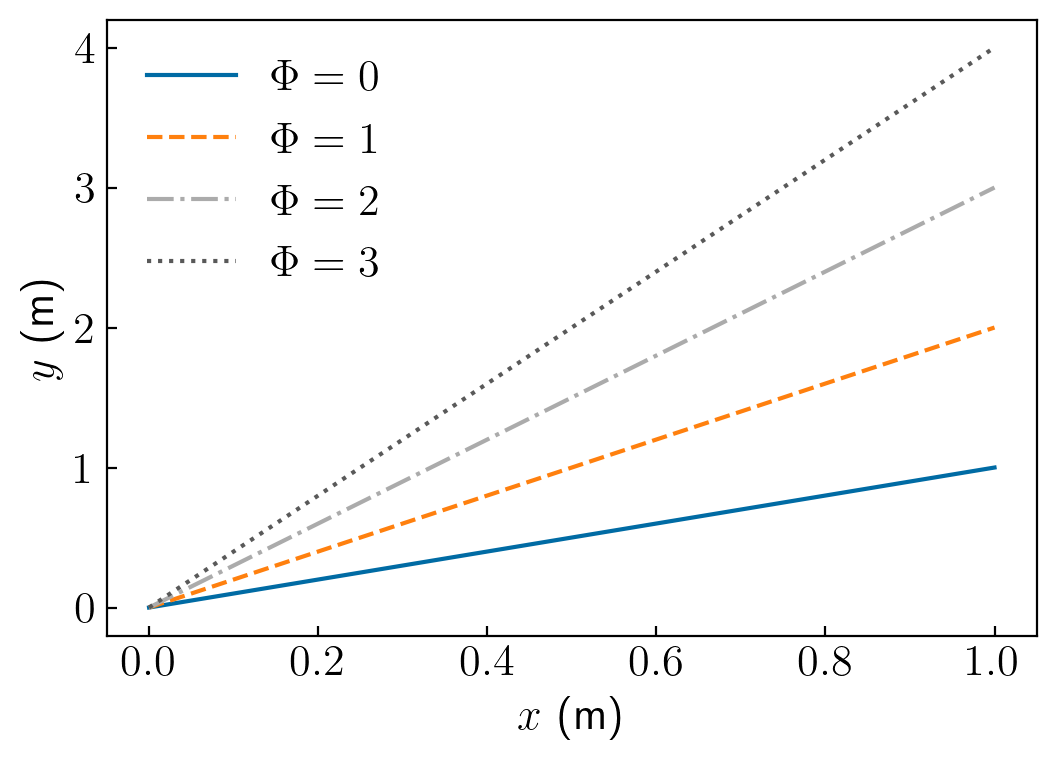

In [19]:
plt.rcParams.update(
    {
        "text.usetex": True,
    }
)

tableau10blind = [
    "#006BA4",
    "#FF800E",
    "#ABABAB",
    "#595959",
    "#5F9ED1",
    "#C85200",
    "#898989",
    "#A2C8EC",
    "#FFBC79",
    "#CFCFCF",
]
linestyles = ["-", "--", "-.", ":", "-", "--", "-.", ":"]

NL = 4
for i in range(NL): plt.plot([0, 1], [0, i+1], color=tableau10blind[i], linestyle=linestyles[i])
plt.xlabel("$x$ (m)", fontsize=16)
plt.ylabel("$y$ (m)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend([rf"$\Phi={i}$" for i in range(NL)], fontsize=16)
plt.show()

### Use matplotlib's rcParams (intermediate)

An more central way of defining the plotting style is to use matplotlib [rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.html). These allow a central definition of certain styles that are applied to all of your plots below this definition.

| Pros | Cons |
| ------- | ------- |
| rcParams are defined directly in file | Cluttered code |
| More efficient | **code-duplications** |

```{note}
This way of defining the style was used for the example plot shown in previous example.
```

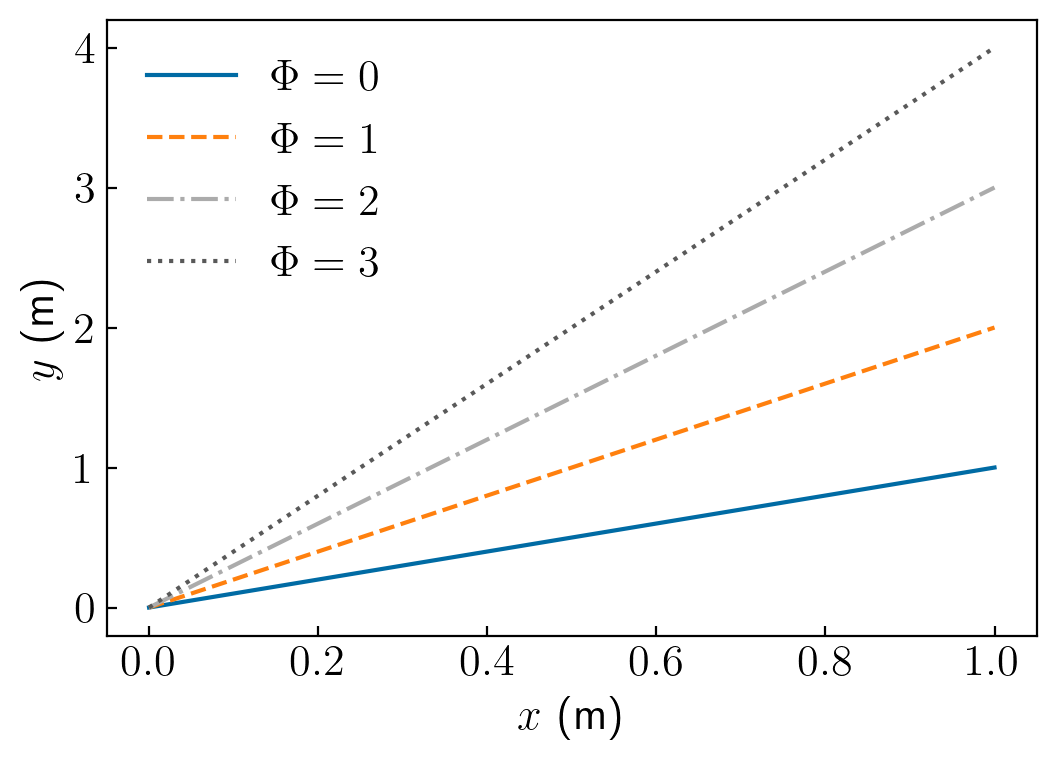

In [18]:
tableau10blind = [
    "#006BA4",
    "#FF800E",
    "#ABABAB",
    "#595959",
    "#5F9ED1",
    "#C85200",
    "#898989",
    "#A2C8EC",
    "#FFBC79",
    "#CFCFCF",
]
linestyles = ["-", "--", "-.", ":", "-", "--", "-.", ":", "-", "--"]

plt.rcParams.update(
    {
        "text.usetex": True,
        "font.size": 16,
        "axes.prop_cycle": mpl.cycler(color=tableau10blind, linestyle=linestyles),
    }
)
NL = 4
for i in range(NL): plt.plot([0, 1], [0, i+1])
plt.xlabel("$x$ (m)")
plt.ylabel("$y$ (m)")
plt.legend([rf"$\Phi={i}$" for i in range(NL)])
plt.show()

### Use matplotlib stylesheets

For me the gold-standard to define my own plotting style is to use [matplotlib stylesheets](https://matplotlib.org/stable/tutorials/introductory/customizing.html). The Pros of this methods are:
- Central style definition
- Easy reuse
- Highly flexible
- Very clean code

#### The plotting style

Matplotlib-style files are defined in a .json like format:

In [13]:
!cat ../plottingstyle/mystyle.mplstyle

### General plotting style. ###

## Figure options ##
figure.figsize   : 6.0, 4.0   ## figure size in inches
figure.dpi       : 200        ## scaling of figure in matplotlib

# Resolution for png files
savefig.dpi   : 500           ## dpi of figure for saving

# Set axes ticks #
xtick.direction : in    ## direction: in, out, or inout
ytick.direction : in    ## direction: in, out, or inout
axes.formatter.limits : -3, 4 ## use scientific notation if log10
                               ## of the axis range is smaller than the
                               ## first or larger than the second

# Options for legend
legend.frameon : false
legend.fontsize : medium

# Set some basic colors
## tableau colorblind
axes.prop_cycle: cycler('color', ['006BA4', 'FF800E', 'ABABAB', '595959', '5F9ED1', 'C85200', '898989','A2C8EC', 'FFBC79', 'CFCFCF'])
patch.facecolor: 006BA4

image.cmap    : turbo

#### Plot generation

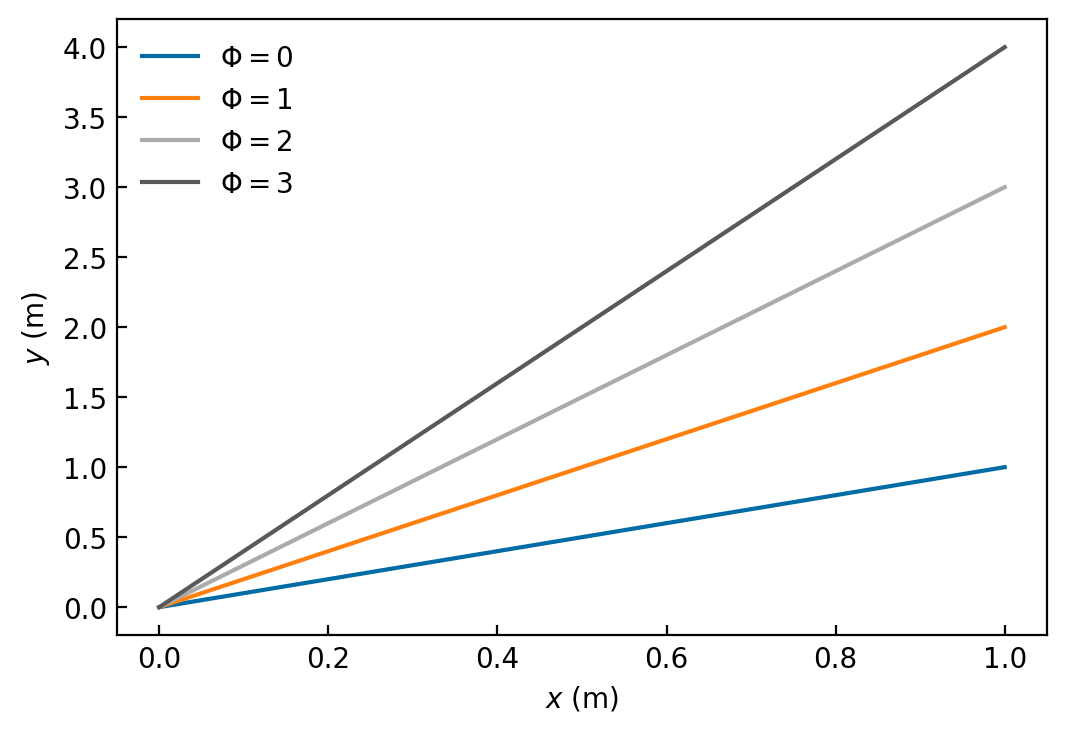

In [17]:
# Reset rc parameters (not necessary)
plt.rcdefaults()

plt.style.use(["../plottingstyle/mystyle.mplstyle"])

NL = 4
for i in range(NL): plt.plot([0, 1], [0, i+1])
plt.xlabel("$x$ (m)")
plt.ylabel("$y$ (m)")
plt.legend([rf"$\Phi={i}$" for i in range(NL)])
plt.show()

### Make plotting styles globally available

Plotting styles can be either loaded from a specific path (see above), or placed into the matplotlib custom styles folder (recommended). All styles in the custom folder are available in every python script you use.
You can find the directory to use by using:

In [20]:
mpl.get_configdir()

'/Users/nicolai/.matplotlib'

In [21]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#### Load multiple plotting styles
- Custom scheme
- Journal/lab specific settings (e.g. font-size, ...)

In [24]:
plt.style.use(
    ["../plottingstyle/mystyle.mplstyle", "../plottingstyle/labstyle.mplstyle"]
)
# create_plot()

In [29]:
# Apply only locally
with plt.style.context("../plottingstyle/labstyle.mplstyle"):
    print("create_plot 1 ... using lab style")

print("create_plot 2 ... using my style")

create_plot 1 ... using lab style
create_plot 2 ... using my style


```{note}
If you do not have the styles available everywhere, you can simply place the styles inside a `try-except` loop inside your file to ensure fail-safety.
```

```python
try:
    plt.style.use(['style1', 'style2'])
except:
    print("Matplotlib styles not found use default settings")
```

## Additional documentation and usage:

In the file you can divine specific plotting parameters that should be set by default.
Examples for the use can be found in the [documentation](https://matplotlib.org/stable/tutorials/introductory/customizing.html#customizing-with-style-sheets)

Here is also a nice [tutorial](https://towardsdatascience.com/how-to-create-and-use-custom-matplotlib-style-sheet-9393f498063).